<a href="https://colab.research.google.com/github/ingcoder/Image-Processing/blob/master/ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#!mkdir images
!unzip stage1_test.zip -d images/

In [0]:
#Import listdirectory function from OS module
from os import listdir
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

#Retrieve filenames from directory
file_list = pathlib.Path('images').glob('*/images/*.png')
files = sorted([file for file in file_list])
img_path = files[45]

  

In [0]:
#read image
img = cv2.imread(str(img_path))
plt.imshow(img)
plt.xticks([])
plt.yticks([])

print('Original image shape', img.shape)
#print('First row of image matrix', len(img[0,:]))
#print(img[0,:])


New Image Shape (519, 253)


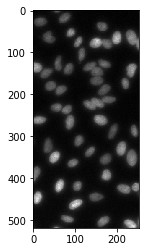

In [0]:
#transform to grayimage
grayimg = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(grayimg, cmap='gray')
print('New Image Shape',grayimg.shape)


(0, 15000)

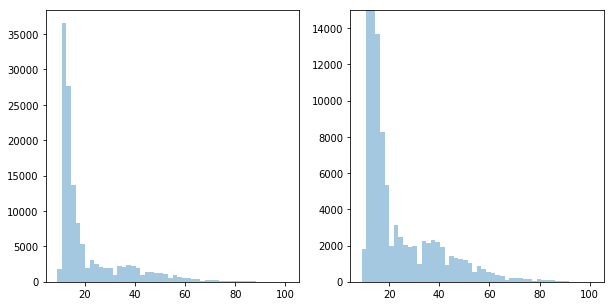

In [0]:
#Removing Background
#Okay let's look at the distribution of the intensity values of all the pixels
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(grayimg.flatten(), kde=False)

plt.subplot(1,2,2)
sns.distplot(grayimg.flatten(), kde=False)
plt.ylim(0,15000)


([], <a list of 0 Text xticklabel objects>)

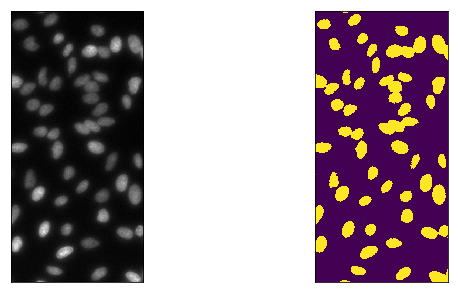

In [0]:
from skimage.filters import threshold_otsu
thresh_value = threshold_otsu(grayimg)
mask = np.where(grayimg > thresh_value, 1, 0)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(grayimg, cmap='gray')
plt.yticks([])
plt.xticks([])

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.yticks([])
plt.xticks([])

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(grayimg.reshape(grayimg.shape[0]*grayimg.shape[1],1))

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(kmeans.labels_.reshape(519, 253),cmap='magma')
plt.title('K-Means')

plt.subplot(1,2,2)
maskimg = mask.copy()
plt.imshow(maskimg, cmap='viridis')
plt.yticks([])
plt.xticks([])




In [0]:
#To check if there's any difference
sum((kmeans.labels_.reshape(519, 253)==mask).flatten())/(mask.shape[0]*mask.shape[1])


1.0

In [0]:
ret, thresh_img = cv2.threshold(grayimg, 519, 253, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(thresh_img)


blur = cv2.GaussianBlur(grayimg, (5,5), 0)
ret, thresh_img2 = cv2.threshold(blur, 519, 253, cv2.THRESH_BINARY+cv2.THRESH_OTSU) 
plt.subplot(1,2,2)
plt.imshow(thresh_img2)

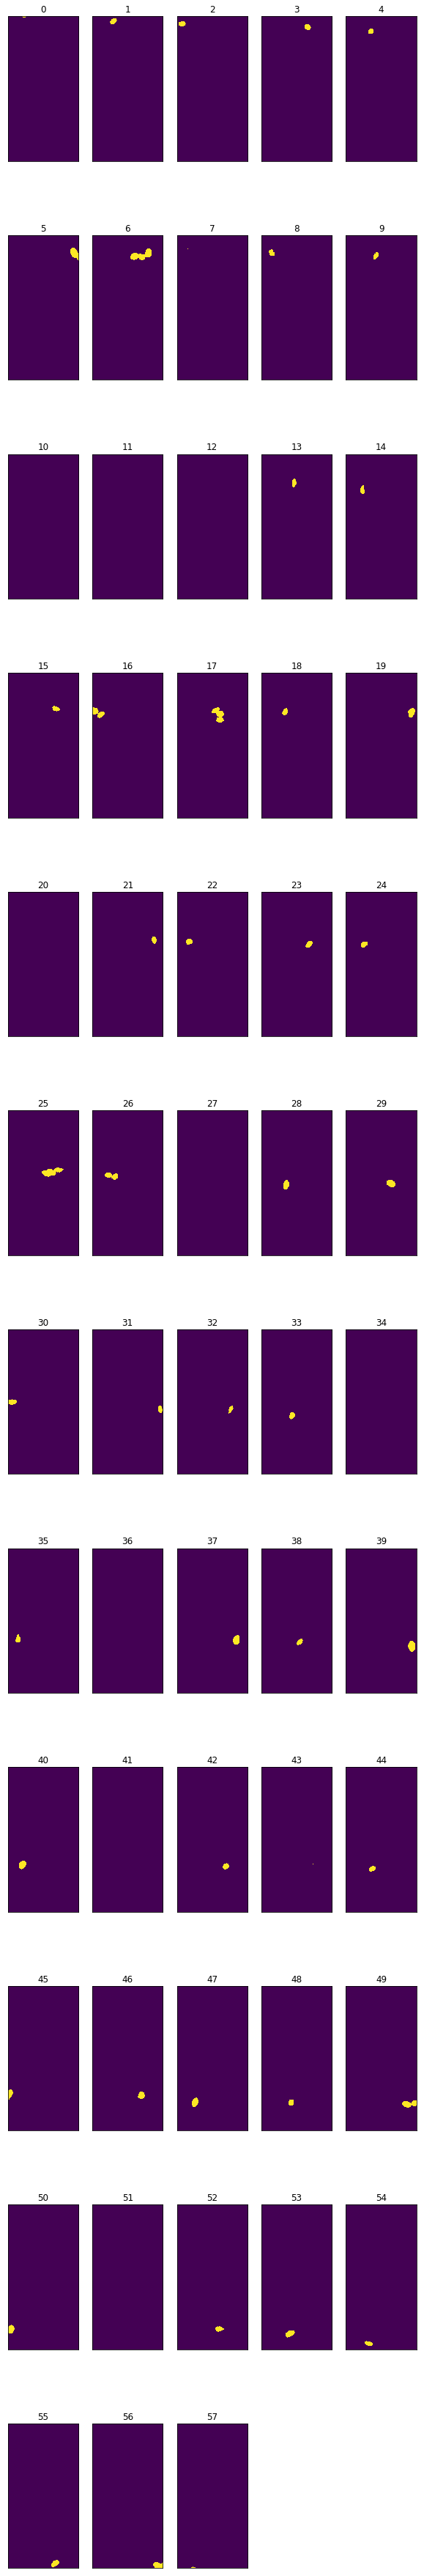

In [0]:
plt.figure(figsize=(10,65))
rows = round(len(mask_list)/cols)  
cols = 5
index = 1

for i in range(0, len(mask_list)):  
    plt.subplot(rows,cols,i+1) 
    plt.imshow(mask_list[index-1])
    plt.title(index-1)
    plt.xticks([])
    plt.yticks([])
    if index < len(mask_list):
        index += 1
    else:
        break  

        
        



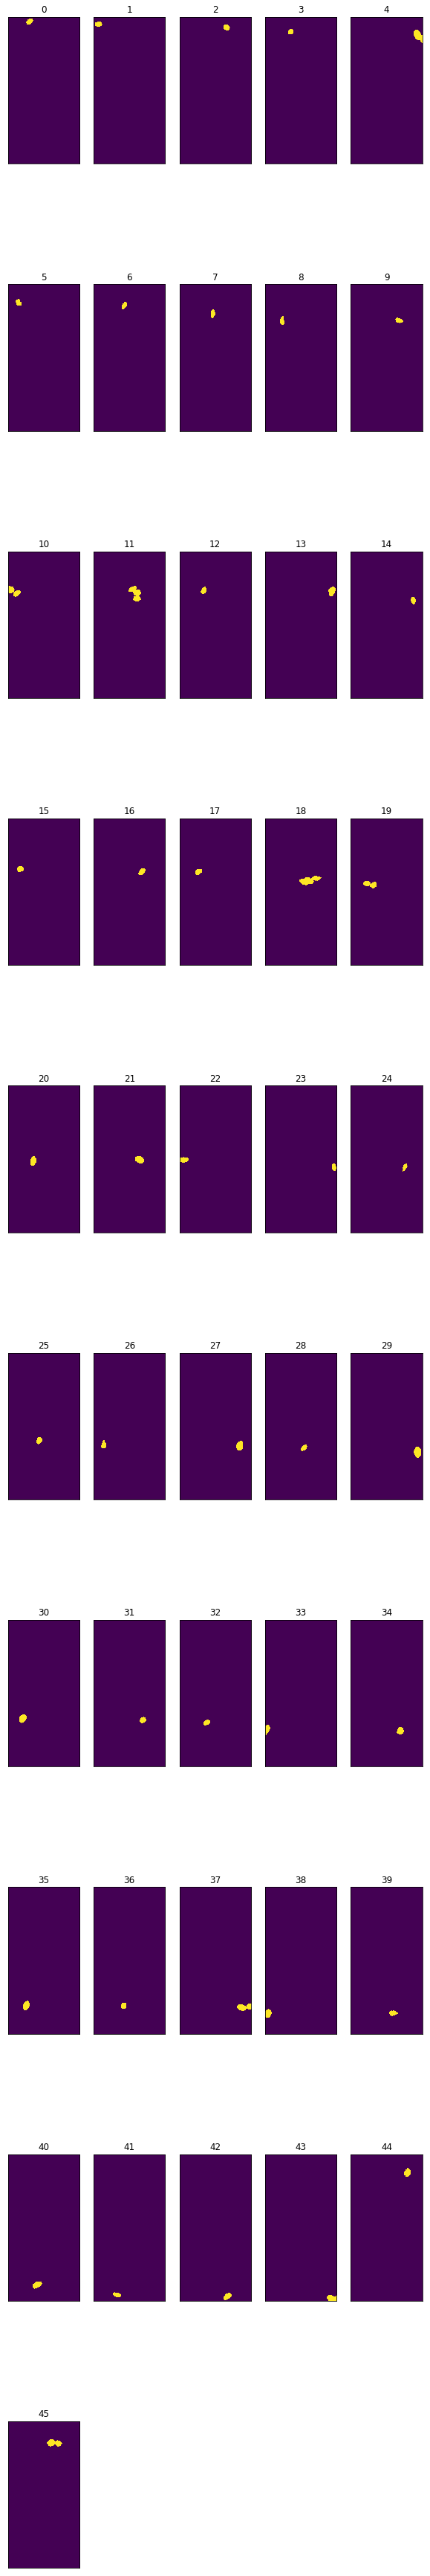

In [0]:
from scipy import ndimage
import math
labels, nlabels = ndimage.label(maskimg)



#Create seperate mask for each label and store in list
def make_individual_masks(labels, nlabels):
    mask_list = []
    
    for counter, coord in enumerate(ndimage.find_objects(labels)):
        #If cell is not to small, create single mask and add to list
        cell = maskimg[coord]  
        if np.product(cell.shape) > 90:
            label_mask = np.where(labels == counter+1, 1, 0) 
            mask_list.append(label_mask)  
        else:
            continue
            
    return mask_list

def show_masks(mask_list):
    plt.figure(figsize=(10,65))
   
    index = 0
    cols = 5
    rows = math.ceil(len(mask_list)/cols) 
    
    for i in range(0, len(mask_list)):  
        plt.subplot(rows,cols,i+1) 
        plt.imshow(mask_list[index])
        
        plt.title(index)
        plt.xticks([])
        plt.yticks([])
        if index < len(mask_list):
            index += 1
        else:
            break   
            
#Opens a mask and returns a list with seperate masks
def open_mask(mask, mask_list, iterations = 10):
    mask_opened = ndimage.binary_opening(mask, iterations= iterations)
    labels_opened, nlabels_opened = ndimage.label(mask_opened)
    mask_list_opened = make_individual_masks(labels_opened, nlabels_opened)
    mask_list.extend(mask_list_opened)
    
    del mask_list[5]
    return mask_list
  
mask_list = make_individual_masks(labels, nlabels)
#show_masks(mask_list)

new_mask_list = open_mask(mask_list[5], mask_list, iterations = 10,)
show_masks(new_mask_list)
    

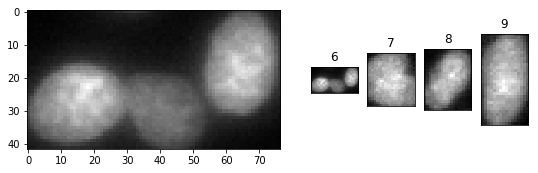

In [0]:
from scipy import ndimage
labels, nlabels = ndimage.label(maskimg)

#Create seperate mask for each label and store in array
mask_list = []
for i in range(1, nlabels+1):
    label_mask = np.where(labels == i, 1, 0) 
    mask_list.append(label_mask)
#print((label_array[10]==1).sum())
         
for counter, label_coords in enumerate(ndimage.find_objects(labels)):
    cell = grayimg[label_coords]
    if np.product(cell.shape) < 10:
        #print('label size is too small {}'.format(counter))  
        mask = np.where(labels == counter+1, 0, mask)

#Regenerate the label
labels, nlabels = ndimage.label(mask)
label_1 = ndimage.find_objects(labels)[4]
plt.figure(figsize=(10,5))
for i in range(1, 10):
  plt.subplot(1,10,i)
  plt.imshow(grayimg[ndimage.find_objects(labels)[i]], cmap='gray')
  plt.title(i)
  plt.xticks([])
  plt.yticks([])

plt.subplot(1,2,1)
plt.imshow(grayimg[ndimage.find_objects(labels)[6]], cmap='gray')


(42, 77)


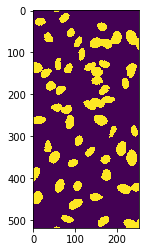

In [0]:
#get object indices and perform binary opening
cell_mask = mask[ndimage.find_objects(labels)[6]]
cell_mask_opened = ndimage.binary_opening(cell_mask, iterations=10)
print(cell_mask_opened.shape)
plt.imshow(mask)



In [0]:
#Convert each labeled object to Run Line Encoding
print(len(new_mask_list[0].flatten()))

#return [(len(list(group)),name) for name, group in groupby(l)]

from itertools import groupby

mask = new_mask_list[0].flatten()
#mask='aaabbbc'
print(type(mask))

grouped = [list(group) for name, group in groupby(mask)]
rle = ' '.join(['{}{}'.format(k, sum(1 for 1 in g)) for k, g in groupby(mask)])





print(rle)
#rle = ''.join()

#grouped = [list(g) for k, g in groupby(string)]


SyntaxError: ignored